# Лабораторная работа 2

## Линейная регрессия

**Перед тем, как приступить к выполнению заданий, подключу необходимые библиотеки.**

In [792]:
import numpy as np

import scipy.linalg

import math

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

### Метод наименьших квадратов: постановка задачи

Рассмотрим систему уравнений $Xa = y$, в которой $a$ &mdash; столбец неизвестных. Её можно переписать в векторном виде
$$x_1 a_1 + x_2 a_2 + \ldots + x_k a_k = y,$$
где $x_1,\ldots,x_n$ &mdash; столбцы матрицы $X$. Таким образом, решить исходную систему означает найти линейную комбинацию векторов $x_1,\ldots,x_n$, равную правой части. Но что делать, если такой линейной комбинации не существует? Геометрически это означает, что вектор $y$ не лежит в подпространстве $U = \langle x_1,\ldots, x_k\rangle$. В этом случае мы можем найти *псевдорешение*: вектор коэффициентов $\hat{a}$, для которого линейная комбинация $x_1 \hat{a}_1 + x_2 \hat{a}_2 + \ldots + x_k \hat{a}_k$ хоть и не равна в точности $y$, но является наилучшим приближением &mdash; то есть ближайшей к $y$ точкой $\hat{y}$ подпространства $U$ (иными словами, ортогональной проекцией $y$ на это подпростанство). Итак, цель наших исканий можно сформулировать двумя эквивалентными способами:

1. Найти вектор $\hat{a}$, для которого длина разности $|X\hat{a} - y|$ минимальна (отсюда название "метод наименьших квадратов");
2. Найти ортогональную проекцию $\hat{y}$ вектора $y$ на подпространство $U$ и представить её в виде $X\hat{a}$.

Далее мы будем предполагать, что векторы $x_1,\ldots,x_n$ линейно независимы (если нет, то сначала имеет смысл выделить максимальную линейно независимую подсистему).

На лекциях было показано, что проекция вектора $y$ на подпространство $U = \langle x_1,\ldots, x_k\rangle$ записывается в виде
$$\hat{y} = X\left(X^TX\right)^{-1}X^Ty,$$
и, соответственно, искомый вектор $\hat{a}$ равен
$$\hat{a} = \left(X^TX\right)^{-1}X^Ty.$$

### Задача линейной регрессии

Начнём с примера. Допустим, вы хотите найти зависимость среднего балла S студента ФКН от его роста H, веса W, длины волос L и N &mdash; количества часов, которые он ежедневно посвящает учёбе. Представьте, что мы измерили все эти параметры для $n$ студентов и получили наборы значений $S_1,\ldots, S_n$, $H_1,\ldots, H_n$ и так далее.

Тут можно подбирать много разных умных моделей, но начать имеет смысл с самой простой, линейной:
$$S = a_1H + a_2W + a_3L + a_4N + a_5.$$
Конечно, строгой линейной зависимости нет (иначе можно было бы радостно упразднить экзамены), но мы можем попробовать подобрать коэффициенты $a_1, a_2, a_3, a_4, a_5$, для которых отклонение правой части от наблюдаемых было бы наименьшим:
$$\sum_{i=1}^n\left(S_i - ( a_1H_i + a_2W_i + a_3L_i + a_4N_i + a_5)\right)^2 \longrightarrow \min$$
И сразу видно, что мы получили задачу на метод наименьших квадратов! А именно, у нас
$$X =
\begin{pmatrix}
H_1 & W_1 & L_1 & N_1 & 1\\
H_2 & W_2 & L_2 & N_2 & 1\\
\dots & \dots & \dots & \dots & \dots \\
H_n & W_n & L_n & N_n & 1
\end{pmatrix},\qquad y=
\begin{pmatrix}
S_1\\ S_2\\ \vdots \\ S_n
\end{pmatrix}$$

Решая эту задачу с помощью уже известных формул, получаем оценки коэффициентов $\hat{a}_i$ ($i = 1\ldots,5$).

Теперь проговорим общую постановку задачи линейной регрессии. У нас есть $k$ переменных $x_1,\ldots,x_k$ ("регрессоров"), через которые мы хотим выразить "объясняемую переменную" $y$:
$$y = a_1x_1 + a_2x_2 + \ldots + a_kx_k$$
Значения всех переменных мы измерили $n$ раз (у $n$ различных объектов, в $n$ различных моментов времени &mdash; это зависит от задачи). Подставим эти данные в предыдущее равенство:
$$\begin{pmatrix}
y_1\\ y_2 \\ \vdots \\ y_n
\end{pmatrix} = 
a_1\begin{pmatrix}
x_{11} \\ x_{21} \\ \vdots \\ x_{n1} \end{pmatrix} + a_2\begin{pmatrix}
x_{12} \\ x_{22} \\ \vdots \\ x_{n2} \end{pmatrix} + \ldots + a_k\begin{pmatrix}
x_{1k} \\ x_{2k} \\ \vdots \\ x_{nk} \end{pmatrix}$$
(здесь $x_{ij}$ &mdash; это значение $j$-го признака на $i$-м измерении). Это удобно переписать в матричном виде:
$$\begin{pmatrix}
x_{11} & x_{12} & \ldots & x_{1k}\\
x_{21} & x_{22} & \ldots & x_{2k}\\
\dots & \dots & \dots & \dots\\
x_{n1} & x_{n2} & \ldots & x_{nk}
\end{pmatrix} \cdot
\begin{pmatrix}
a_1 \\ a_2 \\ \vdots \\ a_k
\end{pmatrix} = 
\begin{pmatrix}
y_1 \\ y_2 \\ \vdots \\ y_n
\end{pmatrix}$$
или коротко $Xa = y$. Поскольку на практике эта система уравнений зачастую не имеет решения (ибо зависимости в жизни редко бывают действительно линейными), методом наименьших квадратов ищется псевдорешение.

### Оценка качества. Обобщающая способность. Обучение и тест 

После того, как вы построили регрессию и получили какую-то зависимость объясняемой переменной от регрессоров, настаёт время оценить качество регрессии. Есть много разных функционалов качества; мы пока будем говорить только о самом простом и очевидном из них &mdash; о среднеквадратичной ошибке (mean square error). Она равна
$$\frac1{n}|X\hat{a} - y|^2 = \frac1{n}\sum_{i=1}^n\left(\hat{a}_1x_{i1} + \hat{a}_2x_{i2} + \ldots + \hat{a}_kx_{ik} - y_i\right)^2$$

В целом хочется искать модели с наименьшей mean square error на имеющихся данных. Однако слишком фанатичная гонка за минимизацией ошибки может привести к печальным последствиям. Например, если мы приближаем функцию одной переменной по значениям в $n$ точках, то наилучшей с точки зрения этой ошибки моделью будет многочлен $(n-1)$-й степени, для которого эта ошибка будет равна нулю.  Тем не менее, вряд ли истинная зависимость имеет вид многочлена большой степени. Более того, значения вам скорее всего даны с погрешностью, то есть вы подогнали вашу модель под свои зашумлённые данные, но на любых других данных (то есть в других точках) точность, скорее всего, окажется совсем не такой хорошей. Этот эффект называют **переобучением**; говорят также, что **обобщающая способность** модели оказалась скверной.

Чтобы не попадать в эту ловушку, данные обычно делят на обучающие (по которым строят модель и оценивают коэффициенты) и тестовые. Лучшей стоит счесть ту модель, для которой значение функционала качества будет меньше.

### Задание 1. Метод наименьших квадратов (4 балла)

Скачайте файлы ``train.txt`` и ``test.txt``. В первом из них находится обучающая выборка, а во втором &mdash; тестовая. Каждый из файлов содержит два столбца чисел, разделённых пробелами: в первом &mdash; $n$ точек (значения аргумента $x$), во втором &mdash; значения некоторой функции $y = f(x)$ в этих точках, искажённые случайным шумом. Ваша задача &mdash; по обучающей выборке подобрать функцию $y = g(x)$, пристойно приближающую неизвестную вам зависимость.

Загрузим обучающие и тестовые данные (не забудьте ввести правильный путь!).

In [491]:
data_train = np.loadtxt('/Users/aefrt/Downloads/train.txt', delimiter=',')
data_test = np.loadtxt('/Users/aefrt/Downloads/test.txt', delimiter=',')

Разделим значения $x$ и $y$

In [492]:
X_train = data_train[:,0]
y_train = data_train[:,1]

# Сделайте то же для тестовой выборки
X_test = data_test[:,0]
y_test = data_test[:,1]

Найдите с помощью метода наименьших квадратов линейную функцию ($y = kx + b$), наилучшим образом приближающую неизвестную зависимость. Полезные функции: ``numpy.ones(n)`` для создания массива из единиц длины $n$ и ``numpy.concatenate((А, В), axis=1)`` для слияния двух матриц по столбцам (пара ``А`` и ``В`` превращается в матрицу ``[A B]``).

**1. Для начала создам двумерную матрицу, состояющую из столбцов X_train и столбца, состоящего полностью из единиц. Эта матрица, умноженная на вектор столбец $x = (k, b)$, даст вектор-столбец $\hat{y}$ —— псевдорешение $Ax = y$.**

In [493]:
X_train.shape = (len(X_train), 1)
ones_for_X_train = np.ones(len(X_train))
ones_for_X_train.shape = (len(ones_for_X_train), 1)
X_train = (np.concatenate((X_train, ones_for_X_train), axis=1))
y_train.shape = (len(y_train), 1)
print(X_train)
print(y_train)

X_test.shape = (len(X_test), 1)
ones_for_X_test = np.ones(len(X_test))
ones_for_X_test.shape = (len(ones_for_X_test), 1)
X_test = (np.concatenate((X_test, ones_for_X_test), axis=1))
y_test.shape = (len(y_test), 1)
print(X_test)
print(y_test)

[[-0.2   1.  ]
 [-0.14  1.  ]
 [-0.08  1.  ]
 [-0.02  1.  ]
 [ 0.04  1.  ]
 [ 0.1   1.  ]
 [ 0.16  1.  ]
 [ 0.22  1.  ]
 [ 0.28  1.  ]
 [ 0.34  1.  ]
 [ 0.4   1.  ]
 [ 0.46  1.  ]
 [ 0.52  1.  ]
 [ 0.58  1.  ]
 [ 0.64  1.  ]
 [ 0.7   1.  ]
 [ 0.76  1.  ]
 [ 0.82  1.  ]
 [ 0.88  1.  ]
 [ 0.94  1.  ]
 [ 1.    1.  ]]
[[4.10083261]
 [4.75632474]
 [4.16278839]
 [4.94568077]
 [4.9964461 ]
 [3.67344585]
 [4.07405522]
 [4.12650853]
 [5.25101279]
 [5.69160283]
 [5.06788376]
 [6.07176274]
 [5.76661215]
 [5.76998646]
 [5.39647832]
 [5.46744837]
 [5.46450349]
 [7.23168494]
 [6.09781368]
 [7.0778812 ]
 [7.05182585]]
[[-0.3   1.  ]
 [-0.23  1.  ]
 [-0.16  1.  ]
 [-0.09  1.  ]
 [-0.02  1.  ]
 [ 0.05  1.  ]
 [ 0.12  1.  ]
 [ 0.19  1.  ]
 [ 0.26  1.  ]
 [ 0.33  1.  ]
 [ 0.4   1.  ]
 [ 0.47  1.  ]
 [ 0.54  1.  ]
 [ 0.61  1.  ]
 [ 0.68  1.  ]
 [ 0.75  1.  ]
 [ 0.82  1.  ]
 [ 0.89  1.  ]
 [ 0.96  1.  ]
 [ 1.03  1.  ]
 [ 1.1   1.  ]]
[[4.22468198]
 [3.6806801 ]
 [4.86193723]
 [4.12182311]
 [3.89129282]
 [4

**2. Напишу функции MNK(X, y), вычисляющую псевдорешение системы $Xa = y$ с помощью МНК по формуле, указанной выше, и find_a_hat(X, y), которая находит вектор $\hat{a}$.**

In [494]:
def MNK(X, y):
    return ((X.dot(scipy.linalg.inv(X.T.dot(X)))).dot(X.T)).dot(y)

def find_a_hat(X, y):
    return ((scipy.linalg.inv(X.T.dot(X))).dot(X.T)).dot(y)

**3. Найду псевдорешение и вектор $\hat{a}$.**

In [495]:
y_hat = MNK(X_train, y_train)
print(y_hat)
a_hat = find_a_hat(X_train, y_train)
print(a_hat)

[[3.97740401]
 [4.11415208]
 [4.25090015]
 [4.38764822]
 [4.52439628]
 [4.66114435]
 [4.79789242]
 [4.93464049]
 [5.07138856]
 [5.20813663]
 [5.3448847 ]
 [5.48163277]
 [5.61838084]
 [5.75512891]
 [5.89187698]
 [6.02862505]
 [6.16537312]
 [6.30212119]
 [6.43886926]
 [6.57561733]
 [6.7123654 ]]
[[2.2791345 ]
 [4.43323091]]


Нарисуйте на плоскости точки $(x_i, y_i)$ и полученную линейную функцию. Глядя на данные, подумайте, многочленом какой степени можно было бы лучше всего приблизить эту функцию. Найдите этот многочлен и нарисуйте его график.

**1. Создам массив из двух точек g_x и соответствующих им g_y (они будут подмножествами области определения и области значений $g(x)$ соответственно), чтобы построить по ним примую.**

In [496]:
g_x = []
g_y = []
g_x.append(-0.3)
g_y.append(a_hat[0] * (-0.3) + a_hat[1])
g_x.append(1.4)
g_y.append(a_hat[0] * 1.4 + a_hat[1])

**2. Построю график $y = g(x)$ и изображу на нём точки из $(x_i, y_i)$ из тренировочной выборки**

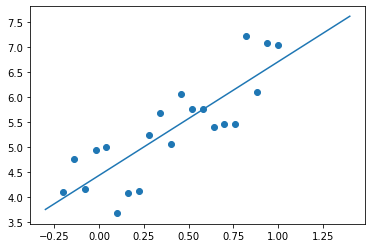

In [497]:
plt.scatter(X_train[:,0], y_train)
plt.plot(g_x, g_y)
plt.show()

**3. Глядя на данные, подумайте, многочленом какой степени можно было бы лучше всего приблизить эту функцию. Найдите этот многочлен и нарисуйте его график.**

**Решение:**

Глядя на данные, можно заметить, что X_train состоит из 21 элемента. Многочлен степени 20 при подстановке вместо x какого-либо элемента из X_train становится линейной комбинацией из 21 элемента. Через 21 точку можно провести многочлен, который проходит через все эти точки, поэтому можно предположить, что лучше всего функцию $g(x)$ можно приблизить многочленом 21 степени. Перейду к нахождению этого многочлена.

Пусть $P(x) = a_k * x^k + ... + a_1 * x + a_0$. Найду такой вектор-столбец $a = (a_0, \ldots, a_k)$, что для любого $i$ от 1 до 21 $P(x_i) \approx y_i$, с помощью линейной регрессии. Для $x_i$ из X_train $P(x_i)$ можно считать функцией от $k + 1$-й переменной из вектор-столбца $a = (a_k, ..., a_0)$. Найду такое $a$, что, считая, что $X := ((x_i)^j)$ при $j$ от 0 до $k$, $i$ от 1 до 21, $|Xa - y|$ минимальна с помощью МНК.

**3.1. Напишу функции polynomial_equals, с помощью которой можно вычислить значение многочлена, заданного коэффициентами $(a_0, ..., a_k)$ в базисе $(x^0, \ldots, x^k)$ в точке $x$, и mean_square_error для вычисления среднеквадратической ошибки.**

polynomial —— это массив (pylist), который хранит вектор-столбец вида $(a_0, ..., a_k)$.

In [534]:
def polynomial_equals(polynomial, point):
    res = 0.
    for i in range(len(polynomial)):
        res += pow(point, i) * polynomial[i]
    return res

def mean_square_error(X, a, y):
    res = 0.
    i = 0
    for x in X:
        tmp = 0
        res += pow(np.array(x).dot(np.array(a))[0] - y[0][i], 2)
        i += 1
    return (1 / len(X)) * res

**3.2. Напишу функцию polynomial_coefficients для поиска матрицы $X = ((x_i)^j)$, polynomial для поиска вектор-столбца $(a_0, \ldots, a_k)$, и print_polynomial для вывода найденного полинома на экран.**

In [448]:
def polynomial_coefficients(X, k):
    res = np.ones((len(X), k + 1))
    for i in range(0, len(X)):
        for j in range(0, k + 1):
            res[i,j] = pow(X[i][0], j)
    return res

def polynomial(X, k, y):
    return find_a_hat(polynomial_coefficients(X, k), y)

def print_polynomial(polynomial):
    res = ""
    for i in range(len(polynomial)):
        if i == 0:
            res += str(polynomial[i][0])
        elif i < len(polynomial) - 1:
            if polynomial[i] > 0:
                res += " + "
                res += str(+polynomial[i][0])
            else:
                res += " - "
                res += str(-polynomial[i][0])
            if i != 1:
                res += "x^" + str(i)
            else:
                res += "x"
        else:
            if polynomial[i] > 0:
                res += " + "
                res += str(+polynomial[i][0])
            else:
                res += " - "
                res += str(-polynomial[i][0])
            if i != 1:
                res += "x^" + str(i)
            else:
                res += "x"
    return res

**3.3.Найду многочлен 20 степени и построю его график, а также найду среднеквадратическую ошибку с помощью написанных выше функций.**

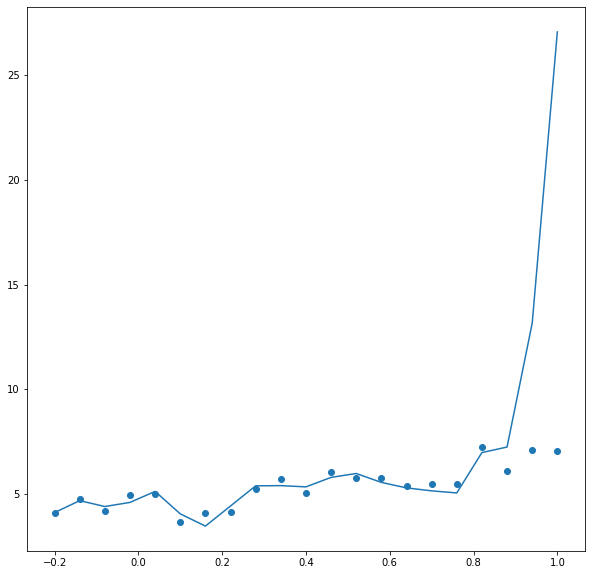

Среднеквадратическая ошибка равна 20.992144852131393


In [465]:
plt.figure(figsize=(10, 10))
plt.scatter(X_train[:,0], y_train)

x_20 = []
y_20 = []
for x in X_train[:,0]:
    x_20.append(x)
    y_20.append(polynomial_equals(polynomial(X_train, 20, y_train), x))
        
plt.plot(x_20, y_20)
plt.show()
print("Среднеквадратическая ошибка равна", mean_square_error(polynomial_coefficients(X_train, 20), polynomial(X_train, 20, y_train), y_train.T))

Многочлен неидеально приблизил функцию $g(x)$, так как не все столбцы из X_train линейно независимы. Действительно, ранг матрицы равен 20, а не 21, как видно из вычисленной ниже разности:

In [466]:
print(np.linalg.matrix_rank(polynomial_coefficients(X_train, 20)) - len(polynomial_coefficients(X_train, 20)))

-1


Для $k = 1,2,3,\ldots,10$ найдите многочлен $\hat{f}_k$ степени $k$, наилучшим образом приближающий неизвестную зависимость. Для каждого из них найдите среднеквадратическую ошибку на обучающих данных и на тестовых данных: $\frac1{n}\sum_{i=1}^n\left( \hat{f}_k(x_i) - y_i \right)^2$ (в первом случае сумма ведётся по парам $(x_i, y_i)$ из обучающих данных, а во втором - по парам из тестовых данных).

Для $k = 1,2,3,4,6$ напечатайте коэффициенты полученных многочленов и нарисуйте их графики на одном чертеже вместе с точками $(x_i, y_i)$ (возможно, график стоит сделать побольше; это делается командой `plt.figure(figsize=(width, height))`).

**Решение:**
Напишу программу, которая сделает всё необходимое. Значения ошибок, оформленные в виде таблицы, многочлены и их степени выведу после графика с помощью функций, написанных выше.

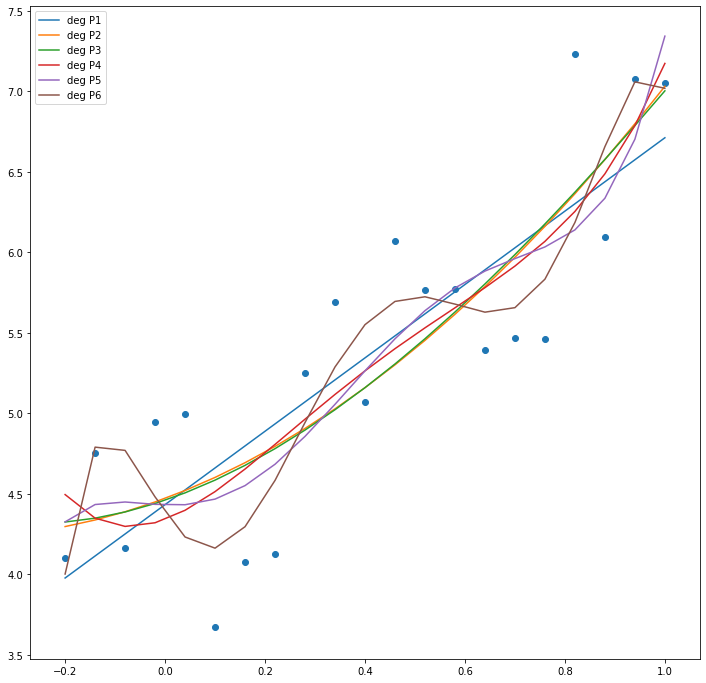

deg P	train error		test error
1	0.29689663326251964	0.43512020040488775
2	0.2696989158766913	0.3564762887831241
3	0.26949718714796095	0.3553464571518524
4	0.2610665330579273	0.441727018928971
5	0.24998504648317565	0.5579732021632928
6	0.1882934898837019	2.5816929327779343
7	0.1853962115329447	2.5157828948809624
8	0.15905556579089294	4.357288614352405
9	0.1584718427471699	4.776339483986325
10	0.1531661100030784	14.632478586777967
	
deg P = 1 
P(x) = 4.433230905064935 + 2.2791344980519463x

deg P = 2 
P(x) = 4.472476503404164 + 1.1578316883597337x + 1.4016285121152756x^2

deg P = 3 
P(x) = 4.460736355285098 + 1.065016105285233x + 1.8597508372608589x^2 - 0.3817686042878532x^3

deg P = 4 
P(x) = 4.341166120399745 + 1.1718023926318009x + 6.794091784358358x^2 - 13.051328119985527x^3 + 7.9184746973127105x^4

deg P = 5 
P(x) = 4.4312978138234325 - 0.1305980398779396x + 3.274714401814858x^2 + 21.374796276320048x^3 - 51.131481385549066x^4 + 29.5249780414227x^5

deg P = 6 
P(x) = 4.38379501102776

In [484]:
for_errors_P = []
for_errors_train = []
for_errors_test = []
polynomials = []

fig, ax = plt.subplots()
plt.scatter(X_train[:,0], y_train)

for i in range(1, 11):
    tmp = polynomial(X_train, i, y_train)
    g_i_x = []
    g_i_y = []
    for x in X_train[:,0]:
        g_i_x.append(x)
        g_i_y.append(polynomial_equals(tmp, x))
    if i <= 6:
        ax.plot(g_i_x, g_i_y, label = 'deg P' + str(i))
    for_errors_P.append(i)
    polynomials.append(print_polynomial(tmp))
    for_errors_train.append(mean_square_error(polynomial_coefficients(X_train, i), tmp, y_train.T))
    for_errors_test.append(mean_square_error(polynomial_coefficients(X_test, i), tmp, y_test.T))
ax.legend()
fig.set_figheight(12)
fig.set_figwidth(12)
plt.show()

print("deg P\t", "train error", "\t\ttest error", sep='')
for i in range(len(for_errors_P)):
    print(for_errors_P[i], for_errors_train[i], for_errors_test[i], sep='\t')
print('\t')

for i in range(len(for_errors_P)):
    print("deg P =", for_errors_P[i], "\nP(x) =", polynomials[i], end='\n\n')

Что происходит с ошибкой при росте степени многочлена? Казалось бы, чем больше степень, тем более сложным будет многочлен и тем лучше он будет приближать нашу функцию. Подтверждают ли это ваши наблюдения? Как вам кажется, чем объясняется поведение ошибки на тестовых данных при $k = 10$?

**Решение:**
Нет, мои наблюдения не подтверждают того, что чем лучше многочлен, тем лучше он приближает функцию. На мой взгляд, это объясняется переобучением — при росте степени многочлена коэффициенты многочлена сильнее "подстраиваются" под тренировочную выборку, что и вызывает переобучение.

### Задание 2. Линейная регрессия (4 балла)

Скачайте файлы ``flats_moscow_mod.txt`` и ``flats_moscow_description.txt``. В первом из них содержатся данные о квартирах в Москве. Каждая строка содержит шесть характеристик некоторой квартиры, разделённые знаками табуляции; в первой строке записаны кодовые названия характеристик. Во втором файле приведены краткие описания признаков. Вашей задачей будет построить с помощью метода наименьших квадратов (линейную) зависимость между ценой квартиры и остальными доступными параметрами.

С помощью известных вам формул найдите регрессионные коэффициенты. Какой смысл имеют их знаки? Согласуются ли они с вашими представлениями о жизни?

Оцените качество приближения, вычислив среднеквадратическую ошибку.

**1. Передам данные из файлов в массивы (pylist) и выведу получившиеся массивы.**
В y_data_2 будут содержаться значения цены, в X_data_2 —— столбцы totsp, livesp, kitsp, dist, metrdist и столбец единиц.

In [549]:
data_2 = []
with open('/Users/aefrt/Downloads/flats_moscow_mod.txt', encoding='ascii') as fin:
    line1 = fin.readline().rstrip('\n')
    data_train_2.append(line1.split('\t'))
    for line in fin:
        data_2.append(line.split('\t'))

X_data_2 = []
y_data_2 = []

for sub_array in data_2:
    y_data_2.append(float(sub_array[0]))
    tmp = []
    for elem in sub_array[1:]:
        tmp.append(float(elem))
    X_data_2.append(tmp)

X_data_2 = np.array(X_data_2)
y_data_2 = np.array(y_data_2)

ones_list = np.ones(len(X_data_2))
ones_list.shape = (len(ones_list), 1)
X_data_2 = (np.concatenate((X_data_2, ones_list), axis=1))
y_data_2.shape = (1, len(y_data_2))

print(y_data_2)
print(X_data_2)

[[ 75. 128.  95. ...  95. 129. 103.]]
[[44.  28.   6.  13.5  7.   1. ]
 [70.  42.   6.  14.5  3.   1. ]
 [61.  37.   6.  13.5  7.   1. ]
 ...
 [60.  46.   5.  10.5  5.   1. ]
 [76.  48.  10.  12.5  5.   1. ]
 [64.  45.   7.  15.5  5.   1. ]]


**2. Пусть $g(x) = a_1x_1 + \ldots + a_5x_5 + a_6$.** 

$g(x)$ — это линейная функция от 5 переменных, выражающая зависимость цены квартиры от площади кухни, жилой площади, общей площади и расстояний от метро и от центра до квартиры. Найду регрессионные коэффициенты $g(x)$ с помощью МНК и вычислю среднеквадратическую ошибку.
Последний элемент в массиве regression_coefficients —— свободный член.

In [550]:
regression_coefficients = find_a_hat(X_data_2, y_data_2[0])
regression_coefficients.shape = ((1, len(regression_coefficients)))
print("Регрессионные коэффициенты:", regression_coefficients)
print("Среднеквадратическая ошибка равна", mean_square_error(X_data_2, regression_coefficients.T, y_data_2))

Регрессионные коэффициенты: [[  1.48697158   1.65631531   1.81863432  -3.32687847  -1.31591706
  -26.77828054]]
Среднеквадратическая ошибка равна 924.450728578998


Смысл знаков коэффициентов состоит в том, что цена квартиры зависит прямо пропорционально от своей общей площади, жилой площади и площади кухни, но обратно пропорционально от расстояния от центра и до метро. Действительно, они согласуются с моими представлениями о жизни — я считаю, что чем больше площадь, тем цена выше, чем дальше квартира от центра и метро, тем цена ниже.

### Усложнение модели

Конечно, никто не гарантирует, что объясняемая переменная (цена квартиры) зависит от остальных характеристик именно линейно. Зависимость может быть, например, квадратичной или логарифмической; больше того, могут быть важны не только отдельные признаки, но и их комбинации. Это можно учитывать, добавляя в качестве дополнительных признаков разные функции от уже имеющихся характеристик: их квадраты, логарифмы, попарные произведения.

В этом задании вам нужно постараться улучшить качество модели, добавляя дополнительные признаки, являющиеся функциями от уже имеющихся. Но будьте осторожны: чрезмерное усложнение модели будет приводить к переобучению. 

**Сравнение моделей**

Когда вы построите новую модель, вам захочется понять, лучше она или хуже, чем изначальная. Проверять это на той же выборке, на которой вы обучались, бессмысленно и даже вредно (вспомните пример с многочленами: как прекрасно падала ошибка на обучающей выборке с ростом степени!). Поэтому вам нужно будет разделить выборку на обучающую и тестовую. Делать это лучше случайным образом (ведь вы не знаете, как создатели датасета упорядочили объекты); рекомендуем вам для этого функцию `sklearn.model_selection.train_test_split`.

**Решение:**
Предположу, что общая и жилая площадь квартиры, расстояние от квартиры до метро и центра влияют на цену сильнее площади кухни. Основываясь на этом предположении, построю функцию $l(x_1, x_2, x_3, x_4, x_5) = a_1x_1^2 + a_2x_2^2 + a_3\sqrt[5]{x_3} + a_4x_4^2 + a_5x_5^2$. 

**1. Разделю X_data_2, y_data_2 на обучающую и тестовую выборки X_train_2, y_train_2, X_test_2, y_test_2**.

In [931]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_data_2, y_data_2[0])

**2. Приступлю к обучению модели.**
Для этого напишу функцию, которая будет, по аналогии с polynomial_coefficients, искать по данной выборке матрицу $(a_{ij})$. $a_{ij} = x_{ij}^2$ при $j \ne 3$, $a_{ij}$ $=$ $\sqrt[5]{x_{ij}}$ при $j = 3$ ($j$ от 1 до 5). По этой матрице с помощью МНК будут находиться регрессионные коэффициенты.

In [932]:
def make_matrix(X, y):
    res = np.ones((len(X), 5))
    for i in range(len(X)):
        for j in range(len(X[i]) - 1):
            if j == 0:
                res[i, j] = pow(X[i, j], 2)
            elif 3 <= j <= 4:
                  res[i, j - 1] = pow(X[i, j], 2)
            elif j == 1:
                res[i, j] = pow(X[i, j], 2)
            elif j == 2:
                res[i, j - 1] = pow(X[i, j], 1./5)
    return res

def mean_square_error_2(X, a, y):
    res = 0.
    i = 0
    for x in X:
        tmp = 0
        res += pow(np.array(x).dot(np.array(a))[0] - y[i], 2)
        i += 1
    return (1 / len(X)) * res

complex_model_coefficients = find_a_hat(make_matrix(X_train_2, y_train_2), y_train_2)

complex_model_coefficients.shape = (1, len(complex_model_coefficients))
y_test_2.shape = (len(y_test_2), 1)

Обучив модель, найду и выведу на экран её среднеквадратическую ошибку на тестовой выборке:

In [933]:
print("linear model:", mean_square_error(X_data_2, regression_coefficients.T, y_data_2))
print("complex model: ", mean_square_error_2(make_matrix(X_test_2, y_test_2), complex_model_coefficients.T, y_test_2)[0])

linear model: 924.450728578998
complex model:  873.2693808656642


Ошибка на новой модели оказалась меньше, чем у линейной, поэтому можно предположить, что она отражает зависимость ближе к реальности. Однако более низкая ошибка была зафиксирована на всего лишь одной случайно построенной выборке. Теперь необходимо доказать, что новая модель лучше старой на любой выборке. Для этого проведу 1000 тестов и вычислю среднюю ошибку. Ожидания не подтвердились — средняя ошибка на новой модели получилась немного выше, чем ошибка на старой. Модель оказалась хуже старой.

In [934]:
sum = 0.
for i in range(0, 1000):
    X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_data_2, y_data_2[0])
    complex_model_coefficients = find_a_hat(make_matrix(X_train_2, y_train_2), y_train_2)
    complex_model_coefficients.shape = (1, len(complex_model_coefficients))
    y_test_2.shape = (len(y_test_2), 1)
    msq_new = mean_square_error_2(make_matrix(X_test_2, y_test_2), complex_model_coefficients.T, y_test_2)[0]
    sum += msq_new
print("average error:", sum / 1000)

average error: 957.8559511187403


### Задание 3. Регуляризация (2 балла)

Вспомним, что задача линейной регрессии формулируется как задача нахождения проекции вектора значений объясняемой переменной $y$ на линейную оболочку $\langle x_1,\ldots,x_k\rangle$ векторов значений регрессоров. Если векторы $x_1,\ldots,x_k$ линейно зависимы, то матрица $X^TX$ вырожденна и задача не будет решаться (то есть будет, но не с помощью приведённой выше формулы). В жизни, по счастью, различные признаки редко бывают *в точности* линейно зависимы, однако во многих ситуациях они скоррелированы и становятся "почти" линейно зависимыми. Таковы, к примеру, зарплата человека, его уровень образования, цена машины и суммарная площадь недвижимости, которой он владеет. В этом случае матрица $X^TX$ будет близка к вырожденной, и это приводит к численной неустойчивости и плохому качеству решений; как следствие, будет иметь место переобучение. Один из симптомов этой проблемы &mdash; необычно большие по модулю компоненты вектора $a$.

Есть много способов борьбы с этим злом. Один из них &mdash; регуляризация. Сейчас мы рассмотрим одну из её разновидностей &mdash; **L2-регуляризацию**. Идея в том, чтобы подправить матрицу $X^TX$, сделав её "получше". Например, это можно сделать, заменив её на $(X^TX + \lambda E)$, где $\lambda$ &mdash; некоторый скаляр. Пожертвовав точностью на обучающей выборке, мы тем не менее получаем численно более стабильное псевдорешение $a = (X^TX + \lambda E)^{-1}X^Ty$ и снижаем эффект переобучения. Параметр $\lambda$ нужно подбирать, и каких-то универсальных способов это делать нет, но зачастую можно его подобрать таким, чтобы ошибка на тестовой выборке падала. 

Теперь давайте вспомним первую задачу. Если вы её сделали, то помните, что ошибка аппроксимации многочленом шестой степени довольно высокая. Убедитесь, что, используя регуляризацию с хорошо подобранным коэффициентом $\lambda$, ошибку на тестовой выборке можно сделать не больше, чем для многочлена оптимальной степени в модели без регрессии. Для этого $\lambda$ сравните $\det(X^TX)$ и $\det(X^TX + \lambda E)$.

**Решение:**

1. Напишу функцию, осуществляющую регуляризацию.

In [754]:
def regularize(X, y, lambda_value):
    return ((scipy.linalg.inv(X.T.dot(X) + lambda_value * np.eye(len(X.T.dot(X))))).dot(X.T)).dot(y)

2. Найду оптимальное значение $\lambda$.

In [962]:
for_graph_l2_y = []
for_graph_l2_x = []

k = 0.
my_min_k = 0.
my_min = mean_square_error(polynomial_coefficients(X_test, 6), regularize(polynomial_coefficients(X_train, 6), y_train, 0), y_test.T)
print("error on polynomial with optimal degree (3):", mean_square_error(polynomial_coefficients(X_test, 3), polynomial(X_train, 3, y_train), y_test.T))
print("error before regularization:", my_min)
while k < 15:
    for_graph_l2_x.append(k)
    error_k = mean_square_error(polynomial_coefficients(X_test, 6), regularize(polynomial_coefficients(X_train, 6), y_train, k), y_test.T)
    for_graph_l2_y.append(error_k)
    if error_k < my_min:
        my_min_k = k
        my_min = error_k
    k += 0.001
print("optimal lambda:", my_min_k)
print("error after regularization:", my_min)

error on polynomial with optimal degree (3): 0.3553464571518524
error before regularization: 2.5816929327779343
optimal lambda: 1.1579999999999833
error after regularization: 0.3073440933186541


Чтобы показать, что такая $\lambda$ действительно оптимальна, построю график зависимости среднеквадратической ошибки модели с регуляризацией от коэффициента регуляризации $k$. Как видно, значения ошибки при $k$, больших $\lambda$, возрастают и вряд ли при каком-то другом значении $k = k_0 > \lambda$ знаечние ошибки модели при данном $k = k_0$ будет ниже, чем при $k$, равном найденному значению $\lambda$.

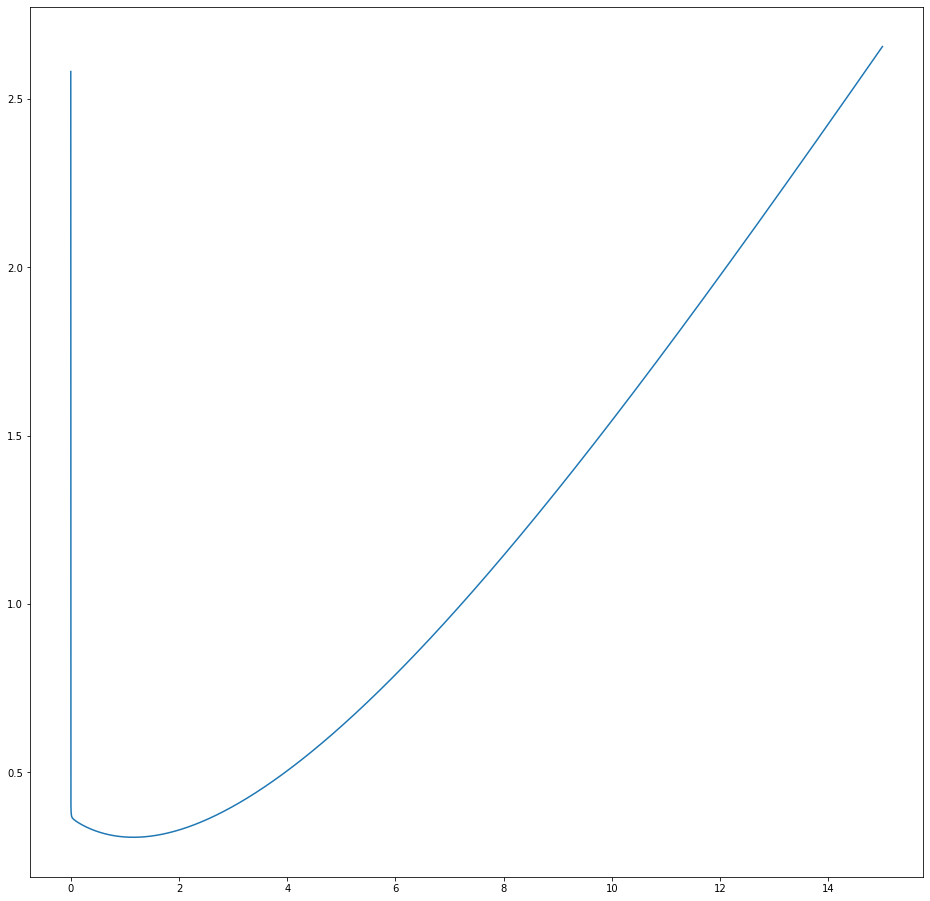

In [963]:
plt.figure(figsize=(16, 16))
plt.plot(for_graph_l2_x, for_graph_l2_y)
plt.show()

3. Сравню их определители.

In [964]:
X_tmp = polynomial_coefficients(X_train, 6)
print("new det", np.linalg.det(X_tmp.T.dot(X_tmp) + my_min_k * np.eye(len(X_tmp.T.dot(X_tmp)))))
print("old det", np.linalg.det(X_tmp.T.dot(X_tmp)))

new det 1012.5548470327516
old det 9.082864838378161e-12


Определитель увеличился, что доказывает, что, используя регуляризацию с хорошо подобранным коэффициентом $\lambda$, ошибку на тестовой выборке можно сделать не больше, чем для многочлена оптимальной степени в модели без регрессии. Чем меньше определитель матрицы $X^TX$, тем хуже аппроксимация в силу проблемы мультиколлинеарности, которая устранилась после регуляризации, как видно из полученных значений определителя до и после неё.

Нарисуйте на одном чертеже графики многочленов шестой степени, приближающих неизвестную функцию, для модели с регуляризацией и без. Чем первый из них выгодно отличается от второго?

Построю требуемые графики.

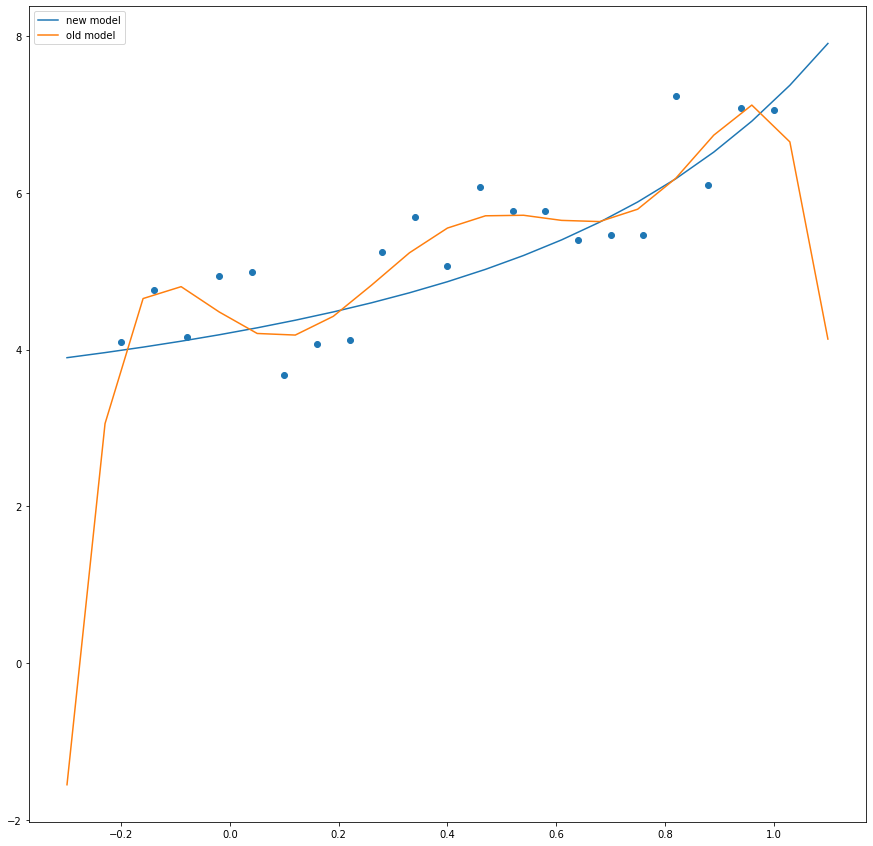

In [965]:
fig, ax = plt.subplots()
plt.scatter(X_train[:,0], y_train)

g_i_l2_x = []
g_i_l2_y = []
for_graph_l2_y = []
for x in X_test[:,0]:
    g_i_l2_x.append(x)
    g_i_l2_y.append(polynomial_equals(polynomial(X_train, 6, y_train), x))
    for_graph_l2_y.append(polynomial_equals(regularize(polynomial_coefficients(X_train, 6), y_train, my_min_k), x))

ax.plot(g_i_l2_x, for_graph_l2_y, label = 'new model')
ax.plot(g_i_l2_x, g_i_l2_y, label = 'old model')

ax.legend()
fig.set_figheight(15)
fig.set_figwidth(15)
plt.show()

**Ответ:**

Как видно, график новой модели отличается тем, что является заметно более гладким. Это может быть полезным, например, в силу того, что, таким образом, в модели с регуляризацией меньше точек излома, следовательно, больше точек, в которой производная непрерывна, а это позволяет эффективнее исследовать получившуюся модель с помощью инструментов математического анализа.

Попробуйте доказать, что вектор $a = (X^TX + \lambda E)^{-1}X^Ty$ является решением задачи

$$|Xa - y|^2 + \lambda|a|^2\rightarrow\min$$

Интуитивно это можно понимать так: мы ищем компромисс между минимизацией длины разности $|Xa - y|$ (то есть точностью решения задачи регрессии) и тем, чтобы компоненты вектора $a$ не становились слишком большими по модулю.

---

**Ваше решение напишите прямо здесь**
1. Пусть $X$ имеет размерность $m \times n$, $\hat{a}$ — $n \times 1$, $y$ — $m\times 1$. Пусть $F_{\lambda}(\hat{a}) = |X\hat{a} - y|^2 + \lambda|\hat{a}|^2$. 
2. Замечу, что $|\hat{a}|^2 = \sum_{i=1}^n(\hat{a}_{1i}^2) = \sum_{i=1}^n(\hat{a}_{1i}\hat{a}_{1i}) = \hat{a}\hat{a}^T$ Аналогично, $|X\hat{a} - y|^2 = (X\hat{a} - y)^T(X\hat{a} - y)$.
3. Вспомню лемму Ферма, которая верна для $R^n$. Тогда $F_{\lambda}(\hat{a}) = 0 <=> dF_{\lambda}(\hat{a}) = 0$.
4. Найду $dF_{\lambda}(\hat{a})$. Из пункта 2 следует, что $(X\hat{a} - y)^TXd\hat{a}$ = $d\hat{a}^TX^T(X\hat{a} - y)$, $\hat{a}^Td\hat{a} = d\hat{a}\hat{a}^T$. Поэтому $dF_{\lambda}(\hat{a})$ = $d$$\hat{a}X^T$$(X\hat{a} - y)$ + $(X\hat{a} - y)^TXd\hat{a}$ + $\lambda d\hat{a}^T\hat{a}$ + $\lambda \hat{a}da = 2d\hat{a}X^T(X\hat{a} - y)$ + $2\lambda d\hat{a}\hat{a}$ = $2d\hat{a}((X^TX + \lambda E)\hat{a} - X^Ty)$.
5. Приравняю производную к нулю. Получу, что $(X^TX + \lambda E)\hat{a} = X^Ty$ при минимальном $\hat{a}$, и такой минимальный вектор-столбец равен $\hat{a}_{\lambda} = (X^TX + \lambda E)^{-1}X^Ty$ — решение этой системы, так как $(X^TX + \lambda E) * (X^TX + \lambda E)^{-1}X^Ty = X^Ty$, что и требовалось доказать.

### Задание 4. Онлайн-обучение линейной регрессии (3 балла)

Раньше мы работали в ситуации, когда объекты $x_i$ и значения $y_i$ даны с самого начала и всегда доступны. Допустим теперь, что пары $(x_i, y_i)$ поступают к нам по одной и мы не можем себе позволить хранить их все в памяти (это может быть актуально, например, если вы пытаетесь обучить модель на устройстве со сравнительно небольшим количеством оперативной памяти: скажем, на мобильном телефоне или на бортовом компьютере спутника связи). В этом случае нам нужно уметь решать следующую задачу:

**Известно:** решение задачи регрессии для датасета $(x_1, y_1),\ldots,(x_t,y_t)$;

**На вход поступает:** новая пара $(x_{t+1}, y_{t+1})$;

**Требуется:** быстро (за время, не зависящее от $t$) отыскать решение задачи регрессии для расширенного датасета $(x_1, y_1),\ldots,(x_t,y_t),(x_{t+1}, y_{t+1})$.

Эту задачу мы будем решать в два этапа.

**Этап 1.** Введём обозначения $X_{(t)} = (x_1\ldots x_t)$ и $y_{(t)} = (y_1,\ldots,y_t)^T$. Тогда, как мы хорошо помним, решение задачи регрессии для датасета $(x_1, y_1),\ldots,(x_t,y_t)$ имеет вид $\hat{a}_{(t)} = \left(X^T_{(t)}X_{(t)}\right)^{-1}X^T_{(t)}y_{(t)}$. Размеры матриц $X^T_{(t)}X_{(t)}$ и $X^T_{(t)}y_{(t)}$ не зависят от $t$, поэтому их мы, пожалуй, можем себе позволить хранить в памяти.

И вот ваше первое задание в этом разделе: придумайте алгоритм, принимающий на вход матрицы $X^T_{(t)}X_{(t)}$ и $X^T_{(t)}y_{(t)}$, а также пару $(x_{t+1}, y_{t+1})$ и вычисляющий матрицы $X^T_{(t+1)}X_{(t+1)}$ и $X^T_{(t+1)}y_{(t+1)}$. Сложность вашего алгоритма не должна зависеть от $t$!

--

**Описание вашего алгоритма напишите прямо здесь**
1. Создается массив A и B размерностями $(t + 1) \times (t + 1)$. В них записывюется матрицы $X^TX$ и $X^Ty$ соответственно. 
2. Последняя строка массива А заполняется так, что становится равной $(x_{t+1}, \ldots, x_{t+1})$, после чего A[t][i] (индексы начинаются с нуля) умножается на (A[i][0] / $\sqrt{A[0][0]}$). $t + 1$-й столбец массива —— это первый столбец (элементы вида A[0][i]), умноженный на $(x_{t+1}/\sqrt{A[0][0]})$. Этот шаг даст верный результат, так как $i$-я строка матрицы-результата произведения вектор столбца и вектор-строки — это этот вектор-столбец, умноженный на $i$-й элемент вектор-строки. 
3. При умножении $(X_{(t+1)}^TX_{(t+1)})^{-1}$ на X_{(t+1)}^Ty_{(t+1)} получится матрица $(\sum{k = 1}^n(x_{ik}x_{1k}y_{1k}))$, поэтому в B нужно добавить ещё одну строку из $x_{t+1}y_{t+1}$.

**Этап 2.** Теперь настало время написать немного кода и порисовать красивые картинки. Вам нужно будет реализовать симуляцию онлайн-обучения регрессии для задачи приближения функции (в данном случае $f_{true}(x) = 2x\sin(x) + x^2 - 1$; все значения искажены небольшим нормальным шумом) многочленом степени не выше 5.

Пусть $A = X^TX$, $B = X^Ty$.

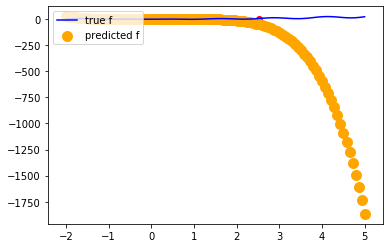

In [961]:
from IPython.display import clear_output
import numpy as np
 
f_true = lambda x: 2*x*np.sin(5*x) + x**2 - 1 # this is the true function
 
# We need this to make the plot of f_true:
x_grid = np.linspace(-2,5,100) # 100 linearly spaced numbers
x_grid_enl = np.hstack((x_grid.reshape((100,1))**j for j in range(6)))
y_grid = f_true(x_grid)
 
 
 
for i in range(200):
 
    x_new = np.random.uniform(-2, 5)
    y_new = f_true(x_new) + 2*np.random.randn()
   
    # your code goes here
    if 'A' not in locals():
        A = np.zeros((6,6))
    if 'B' not in locals():
        B = np.array(np.zeros(6))
        B.shape = (1, 6)
    for k in range(6):
        B[k] += x_new**(5 - k) * y_new
        for j in range(6):
            A[k,j] += x_new**(5 - k) * x_new**(5 - j)
 
   
    # the rest of code is just bells and whistles
    if (i+1)%5==0:
        clear_output(True)
        plt.plot(x_grid,y_grid, color='blue', label='true f')
        plt.scatter(x_new, y_new, color='red')
       
        # your code goes here
        tmp = np.dot(np.linalg.inv(xtx), xty).T[0,:]
        y_pred = np.dot(x_grid_enl, tmp)
           
       
        plt.scatter(x_grid, y_pred, color='orange', linewidth=5, label='predicted f')
       
        plt.legend(loc='upper left')
       
        plt.show()

### Добавление. QR-разложение

**QR-разложением** матрицы $A$ (не обязательно квадратной) мы будем называть её представление в виде $A = QR$, где $Q$ &mdash; матрица с ортонормированными столбцами, а $R$ &mdash; верхнетреугольная матрица.

Смысл QR-разложения следующий. Пусть $a_1,\ldots,a_m$ &mdash; столбцы матрицы $A$, $q_1,\ldots,q_t$ &mdash; столбцы матрицы $Q$. Тогда $q_1,\ldots,q_t$ &mdash; это ортонормированный базис в подпространстве, являющемся линейной оболочкой векторов $a_1,\ldots,a_m$, а в матрице $R$ записаны коэффициенты, с помощью которых $a_i$ выражаются через $q_1,\ldots,q_t$.

Находить QR-разложение заданной матрицы можно разными способами. Мы познакомим вас не с самым лучшим из них, но по крайней мере с наиболее простым концептуально. Заметим, что ортогональный базис линейной оболочки можно найти с помощью ортогонализации Грама-Шмидта. При этом коэффициенты из матрицы $R$ получаются в качестве побочного продукта этого процесса:

```python
for j = 1...n:
    q_j = a_j
    for i = 1,...,j-1:
        r_ij = (q_i, a_j)
        q_j = q_j - r_ij * q_i
    r_jj = |q_j|
    if r_jj == 0: # a_j in <a_1,...,a_j-1>
        # What would you do in this case?..
    q_j = q_j / r_jj
```

Для нахождения QR-разложения вы можете использовать библиотечную функцию `scipy.linalg.qr`.

Поскольку лабораторная про линейную регрессию, не так-то просто замять вопрос о том, какое же отношение QR-разложение имеет к задаче регрессии. Упомянем одно из возможных применений.

Допустим, мы нашли QR-разложение матрицы $X$, а именно: $X = QR$. Тогда
$$X^TX = (QR)^T(QR) = R^TQ^TQR = R^TR$$

Поскольку в задаче регрессии матрица $X$ обычного полного ранга (то есть её столбцы линейно независимы), матрица $R$ будет квадратной. Благодаря этому нашу обычную формулу для набора регрессионных коэффициентов $\hat{a}$ можно переписать в следующем виде:

$$\hat{a} = (X^TX)^{-1}X^Ty = (R^TR)^{-1}(QR)^Ty = R^{-1}(R^T)^{-1}R^TQ^Ty = R^{-1}Q^Ty$$

Как видите, формула стала проще. Более того, зачастую обращение матрицы $R$ может быть численно более устойчиво, чем обращение матрицы $X^TX$.